Just seeing what the catalog looks like.

In [1]:
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import richardsplot

/Users/trevormccaffrey/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [2]:
#Open the catalog of ~750k QSOs
hdul = fits.open("DR16Q_v4.fits")
print(hdul.info(), "\n")
hdul[1].header[:30]

Filename: DR16Q_v4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  CATALOG       1 BinTableHDU    375   750414R x 183C   [18A, D, D, J, J, I, 6A, 6A, I, D, I, D, I, I, I, K, D, I, I, D, I, D, I, D, D, I, D, 12A, D, J, 19A, D, K, D, D, K, D, D, K, D, D, K, D, D, K, D, D, K, D, D, K, D, E, 5D, 5D, 5D, E, D, D, D, D, D, D, D, D, K, K, K, K, K, K, J, J, J, 74J, 74J, 74I, 74I, B, J, 3A, J, J, J, D, D, D, D, 14A, J, D, 5E, 5D, 5E, 5D, 5E, D, D, I, D, D, D, D, I, D, D, D, D, D, D, D, D, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, I, I, D, D, D, D, D, D, J, D, D, D, J, D, D, D, J, D, 21A, D, D, E, E, D, K, D, D, E, E, E, E, E, E, E, D, I, 28A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
None 



XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2290 / length of dimension 1                          
NAXIS2  =               750414 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  183 / number of table fields                         
TTYPE1  = 'SDSS_NAME'                                                           
TFORM1  = '18A     '                                                            
TTYPE2  = 'RA      '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'DEC     '        

In [3]:
data = hdul[1].data

In [4]:
#Pick out some columns that might be useful
#Need to convert data from big- to little-endian for pandas

d = {
    "names" : data['SDSS_NAME'].byteswap().newbyteorder(),
    "RA"    : data['RA'].byteswap().newbyteorder(),
    "DEC"   : data['DEC'].byteswap().newbyteorder(),
    "plate" : data['PLATE'].byteswap().newbyteorder(),
    "mjd"   : data['MJD'].byteswap().newbyteorder(),
    "fiber" : data['FIBERID'].byteswap().newbyteorder(),
    "z"     : data['Z'].byteswap().newbyteorder(),             #best identified redshift 
    "z_vi"  : data['Z_VI'].byteswap().newbyteorder(),          #redshift from visual inspection
    "z_src" : data['SOURCE_Z'].byteswap().newbyteorder(),      #source of best-redshift determination
    "select": data['RANDOM_SELECT'].byteswap().newbyteorder(),
    "objid" : data['OBJID'].byteswap().newbyteorder()

}

In [5]:
df = pd.DataFrame(data=d)
#df.to_csv("quasars.csv")
df.sort_values("z", inplace=True)
df.shape, df.head(15)

((750414, 11),
                      names          RA        DEC  plate    mjd  fiber  \
 336175  105847.65+111115.8  164.698568  11.187737   5356  55979    876   
 628131  163651.46+262656.8  249.214456  26.449127   4190  55686    354   
 469936  132428.66+571640.9  201.119434  57.278030   8201  58146    270   
 164256  080115.01+133642.2  120.312580  13.611725   4501  55590    178   
 182875  082214.83+431701.9  125.561805  43.283863   8279  57063    420   
 630872  164056.85+462447.5  250.236905  46.413220   6027  56103    652   
 192099  083231.97+185400.6  128.133220  18.900192   9566  58083    283   
 698251  224905.26+093044.0  342.271924   9.512226   5055  55889    319   
 58011   010407.53+085816.8   16.031400   8.971344   4551  55569    485   
 586810  154316.78+402634.9  235.819929  40.443039   4976  56046    718   
 443420  125507.04+192459.7  193.779373  19.416594   5859  56065    664   
 482284  133816.45+371639.8  204.568544  37.277746   8877  57782    538   
 105887  0

In [6]:
#This isn't right -- why?
df["plate"][:5000][df["plate"][:5000]<300]

346893    278
365860    281
292693    270
354522    279
454312    294
377694    283
370533    282
289508    270
334528    276
291906    270
451045    294
306690    273
466450    296
450018    294
319406    275
484990    299
479259    298
487507    299
316246    274
347060    278
307422    273
391175    285
391118    285
369474    282
408329    287
291866    270
454943    294
340367    277
296451    271
321966    274
336939    277
418458    289
363757    281
319947    274
263789    266
283136    269
403192    287
480997    298
319391    274
301211    272
447871    293
275683    267
Name: plate, dtype: int32

In [7]:
#The quasars whose redshifts were determined 
#based on DR6Q also have those plate/MJD/fiber combos.
#-->Need to submit separate queries and thus
#need separate files.

#Lowest plate number in dr16 directory is 3523

df_dr6 = df[df["plate"]<3523]
df     = df[df["plate"]>=3523]
((df_dr6["z_src"]=="DR6Q_HW")|(df_dr6["z_src"]=="DR7QV_SCH")).sum(), \
((df["plate"]<3523)).sum()

(73325, 0)

In [8]:
#Separate csvs for separate queries

#Uncomment to save to your machine

#df.to_csv("quasars_dr16z.csv")
#df_dr6.to_csv("quasars_dr6z.csv")

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


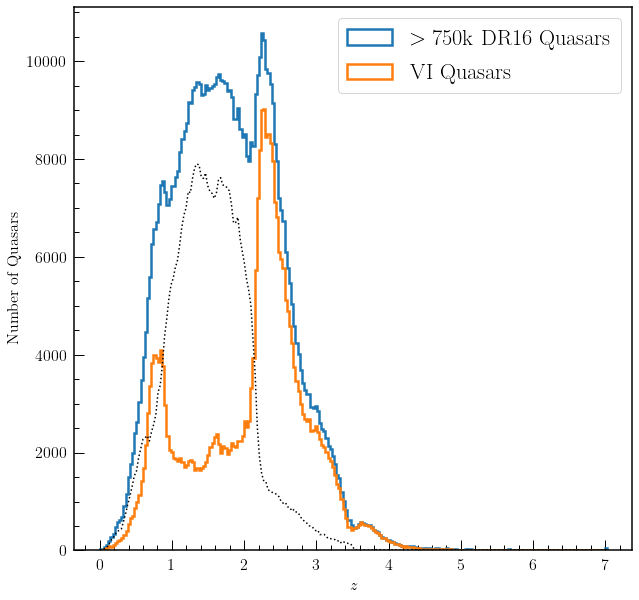

In [9]:
fig = plt.figure(figsize=(10,10))

n1, bins1, patches1 = plt.hist(df["z"][df["z"]>0.], histtype="step", bins="scott", 
                      linewidth=2.5, label="$>750$k DR16 Quasars")

n2, bins2, patches2 = plt.hist(df["z_vi"][((df["z_vi"]>0.)&(df["z_src"]=="VI"))], 
                      histtype="step", bins=bins1, linewidth=2.5, label="VI Quasars")

#n3, bins3, patches3 = plt.hist(df["z_vi"][((df["z_vi"]>0.)&(df["z_src"]=="VI"))], 
#                      histtype="step", bins=bins1, linewidth=2.5, label="VI Quasars")

plt.plot(np.linspace(bins1[0], bins1[-1], len(bins1)-1), n1-n2, ':k')

plt.xlabel("$z$")
plt.ylabel("Number of Quasars")
plt.legend(loc="best", prop={"size": 22.5})
plt.show()

In [10]:
n1.sum()

677079.0

In [11]:
print("Total number of quasars   : %7d" % n1.sum())
print("Visually-inspected quasars: %7d" % n2.sum())

Total number of quasars   :  677079
Visually-inspected quasars:  319283


That obviously isn't right.  Check out the data model for what really indicates which quasars' redshifts were determined based on visual inspection

In [12]:
#Number of quasars in first 5000 records
#with DR6Q redshifts
(df["z_src"][:5000]=="DR6Q_HW").sum()

26

In [13]:
df["z_src"][:5000]

336175      VI
628131      VI
469936      VI
164256      VI
182875    PIPE
          ... 
176755    PIPE
319412    PIPE
152815    PIPE
511161    PIPE
348491    PIPE
Name: z_src, Length: 5000, dtype: object

---

quasar_list_one.awk:


` NR==2,NR==15 { printf("%d/spec-%d-%d-%04d.fits\n", $5,$5,$6,$7) } `


Command line:

` awk -F "," -f quasar_list_one.awk quasars.csv > spec_list.txt `


Now we can bulk-download spectra using this text file:

` wget --spider -nv -r -nH --cut-dirs=7 \
-i speclist.txt \
-B https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/full/ `


I tried getting 5000 quasars to start, knowing there would be some discrepancies with the DR6Q data.  Check how many we successfully download (should be ~5000-1566=3434)

` find spectra/ -type f | wc -l `

gets me 4721 files with <1GB.  Maybe some of the DR6 ones are okay, but should probably still just separate them entirely still so we don't miss any.

----

Get all spectra with dr16 plates (~660k)

` wget -nv -r -nH --cut-dirs=7 \
-i ../speclist_dr16.txt \
-B https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/ `


Get the rest with DR6/7 plates (~73k)

` wget -nv -r -nH --cut-dirs=7 \
-i ../speclist_dr6.txt \
-B data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/lite/ `


Good.  This results in no errors fetching data.